In [5]:
from collections import defaultdict
import itertools
class Ornamentation(object):
    def __init__(self, T, ornaments = None):
        self.T = T
        self.ornaments = dict()
        for u in self.T:
            self.ornaments[u] = {u}
        if ornaments is not None:
            self.ornaments = ornaments
    def __le__(self, other):
        for u in self.T:
            if not(self.ornaments[u].issubset(other.ornaments[u])):
                return False
        return True
    def __eq__(self, other):
        for u in self.T:
            if not(self.ornaments[u] == other.ornaments[u]):
                return False
        return True    
    def __lt__(self, other):
        return (self <= other) and (self != other)
    
    def __hash__(self):
        unhash = {hash(x):x for x in self.T}
        ornaments = []
        for v in sorted(unhash):
            ornaments.append((v, tuple(sorted(
                [hash(x) for x in self.ornaments[unhash[v]]]))))
        return hash(tuple(sorted(ornaments)))
    
    def __repr__(self):
        return str(self.ornaments)
    def __str__(self):
        return str(self.ornaments)
    def __getitem__(self, key):
        return self.ornaments[key]

        
def get_ornamentations_lattice(Tree):
    #T must be a rooted tree with its minimal element at the bottom
    #The vertices of T must be hashable (e.g. integers)
        
    Tree = Poset(Tree)
    ornaments = []
    G = Tree.hasse_diagram().to_undirected()
    for H in G.connected_subgraph_iterator():
        m = Tree.subposet(H).minimal_elements()[0]
        ornaments.append((m, set(H)))
    base_set = set(Tree)
        
    unhash = dict()
    for x in base_set:
        unhash[hash(x)] = x
        
    new_ornaments = [(hash(orn[0]), {hash(y) for y in orn[1]}) for orn in ornaments]
    
    ornament_graph = defaultdict(list)
    for x, y in itertools.combinations(new_ornaments, r = 2):
        if x[0] == y[0]:
            continue
        
        S = set(x[1])
        T = set(y[1])
        compat = True
        if len(S.intersection(T)) == 0:
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
        if not((y[0] in S and not(T.issubset(S))) or (x[0] in T and not(S.issubset(T)))):
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
    ornamentations = Graph(ornament_graph).cliques_maximal()
    out = []
    for orn in ornamentations:
        obj = Ornamentation(Tree)
        for t in orn:
            obj.ornaments[unhash[t[0]]] = set([unhash[x] for x in t[1]])
        out.append(obj)
    d = dict()
    ornamentations = out
    for orn in ornamentations:
        d[orn] = []
    for o1 in ornamentations:
        for o2 in ornamentations:
            if o1 < o2:
                d[o1].append(o2)
                
    return LatticePoset(d)        


In [6]:
def get_max_len_chains(tree):
   L = get_ornamentations_lattice(tree)
   max_chains = L.maximal_chains()
   max_len = max(len(chain) for chain in max_chains)
   max_length_chains = [chain for chain in max_chains if len(chain) == max_len]
   return max_length_chains

def get_spine(T):
   mlchains = get_max_len_chains(T)
   spine = set()
   for chain in mlchains:
      for ornamentation in chain:
         spine.add(ornamentation)
   spine_list = list(spine)
   return spine_list

def if_spine(ornamentation, T):
   spine = get_spine(T)
   if ornamentation in spine:
      return True
   return False

def hypothesis_classification(ornamentation, T):
   for node in T:
      node_image = ornamentation.ornaments[node]
      for child in T[node]:

         child_image = ornamentation.ornaments[child]

         if len(child_image) != 1 and not child_image.issubset(node_image):
            return False
   return True



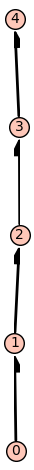

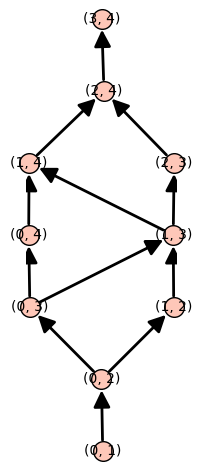

In [7]:
d = dict()
d[0] = [1]
d[1] = [2]
d[2] = [3]
d[3] = [4]


T = Poset(d)

potential = []
for i in T.relations():
    if i[0] != i[1]:
        potential.append((i[0], i[1]))

def leq_func(p1, p2):
    return T.is_lequal(p1[0], p2[0]) and T.is_lequal(p1[1], p2[1])

join_irreducibles_poset = Poset((potential, leq_func))

T.show()
join_irreducibles_poset.show()


In [8]:
len(join_irreducibles_poset.linear_extensions())


12

In [9]:
d = dict()
d[1] = [2,3,4]
d[3] = [5,6,7]
d[2] = [8,9]
T = Poset(d)


spine = get_spine(T)

print(len(spine))

ornamentations = list(get_ornamentations_lattice(T))

hypothesis_spine = []
hypothesis_spine_graded = []
for i in ornamentations:
    if (hypothesis_classification(i, d)):
        hypothesis_spine.append(i)



print(hypothesis_spine)


for i in spine:
    if i not in hypothesis_spine:
        print("failed")


for i in hypothesis_spine:
    if i not in spine:
        print("failed")

print("done")

KeyboardInterrupt: 

In [ ]:
#various properties of ornamentation lattices
print(L.is_semidistributive())
print(L.is_trim())
print(L.is_complemented())

True
True
True


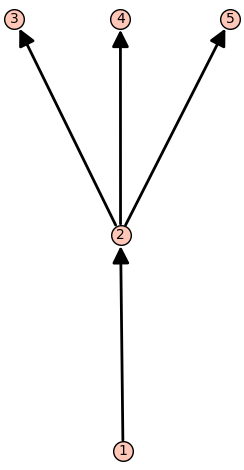

In [ ]:
relations = [(1,2), (2,3), (2,4), (2,5)]
T = Poset((range(1,4), relations))  # vertices 1,2,3,4

# Display the tree (its Hasse diagram)
T.show()

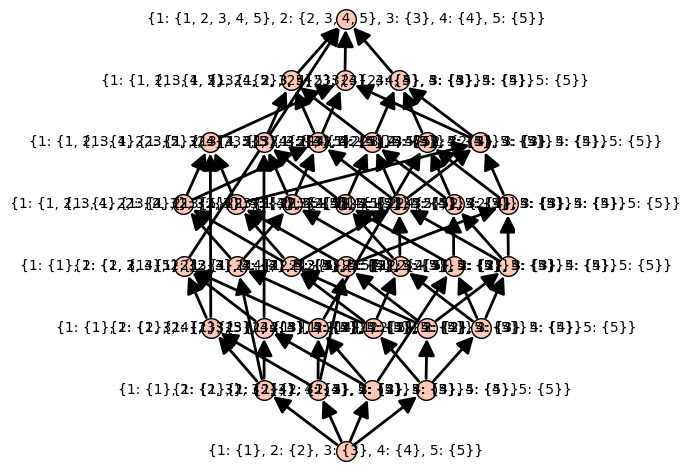

Total number of ornamentations: 35


In [ ]:
L = get_ornamentations_lattice(T)
L.show()
print("Total number of ornamentations:", L.cardinality())

In [ ]:
max_chains = L.maximal_chains()
print("\nMaximal chains:")
for chain in max_chains:
    print(chain)


Maximal chains:
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}]
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}]
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}]
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3}, 3: {3}, 4: {4}, 5: {5}}, {1: {1}, 2: {2, 3, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 5}, 2: {2, 3, 5},

In [ ]:
max_len = max(len(chain) for chain in max_chains)
max_length_chains = [chain for chain in max_chains if len(chain) == max_len]
print("\nMaximal-length chains (length {}):".format(max_len))
print(len(max_length_chains))
for chain in max_length_chains:
    print(chain)


Maximal-length chains (length 8):
90
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4}, 2: {2, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4, 5}, 2: {2, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4, 5}, 2: {2, 4, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 4, 5}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}]
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4}, 2: {2, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4, 5}, 2: {2, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 3, 4, 5}, 2: {2, 3, 4, 5}, 3: {3}, 4: {4}, 5: {5}}]
[{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}, {1: {1, 2, 4}, 2: {2}, 3: {3}, 4

In [ ]:
max_chains = L.maximal_chains()
min_elements = L.minimal_elements()
max_elements = L.maximal_elements()
print("\nUnique minimal element(s):")
for m in min_elements:
    print(m)
print("\nUnique maximal element(s):")
for M in max_elements:
    print(M)


Unique minimal element(s):
{1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}, 6: {6}}

Unique maximal element(s):
{1: {1, 2, 3, 4, 5, 6}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5, 6}, 6: {6}}
